In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F
import warnings
warnings.filterwarnings("ignore")

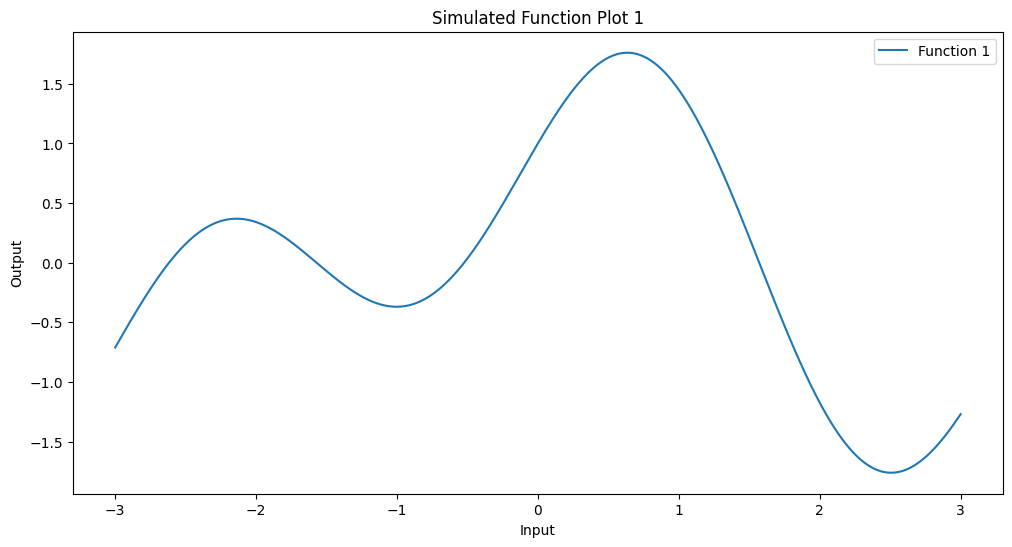

In [2]:
# function 1
def simulate_function_1(x):
    return np.sin(2*x)+np.cos(x)

# Generate training and validation data as tensors
x_train = torch.tensor(np.linspace(-3, 3, 6000).reshape(6000,1), dtype=torch.float32)
y_train = torch.tensor(simulate_function_1(x_train), dtype=torch.float32)
x_val = torch.tensor(np.linspace(-3, 3, 2000).reshape(2000,1), dtype=torch.float32)
y_val = torch.tensor(simulate_function_1(x_val), dtype=torch.float32)

# Plot the validation data
plt.figure(figsize=(12, 6))
plt.plot(x_val, y_val, label='Function 1')
plt.title('Simulated Function Plot 1')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.show()


In [3]:
# The model applies linear transformations and LeakyReLU activations to input data, producing a final output.

class Model_1(nn.Module):
    def __init__(self):
        super(Model_1, self).__init__()
        # Define the layers properly so the weights are part of the model parameters
        self.fc1 = nn.Linear(1, 50)
        self.fc2 = nn.Linear(50, 60)
        self.fc3 = nn.Linear(60, 30)
        self.fc4 = nn.Linear(30, 20)
        self.fc5 = nn.Linear(20, 10)
        self.fc6 = nn.Linear(10, 1)

    def forward(self, x):
        x = F.leaky_relu(self.fc1(x), negative_slope=0.2)
        x = F.leaky_relu(self.fc2(x), negative_slope=0.2)
        x = F.leaky_relu(self.fc3(x), negative_slope=0.2)
        x = F.leaky_relu(self.fc4(x), negative_slope=0.2)
        x = F.leaky_relu(self.fc5(x), negative_slope=0.2)
        output = self.fc6(x)
        return output

# Initializes a model (Model_1), sets up an optimizer (SGD), defines a loss function (MSE)
model_1_1 = Model_1()
optimizer_1_1 = torch.optim.SGD(model_1_1.parameters(), lr=1e-2)
loss_function = torch.nn.MSELoss()

# Calculate total number of parameters in the model
model_1_1_total_params = sum(p.numel() for p in model_1_1.parameters())
print(f'Number of Model 1_1 Parameters: {model_1_1_total_params}')


Number of Model 1_1 Parameters: 5831


In [4]:
# The model applies linear transformations and LeakyReLU activations to input data, producing a final output.

class Model_2(nn.Module):
    def __init__(self):
        super(Model_2, self).__init__()
        # Define the layers properly so the weights are part of the model parameters
        self.fc1 = nn.Linear(1, 50)
        self.fc2 = nn.Linear(50, 40)
        self.fc3 = nn.Linear(40, 30)
        self.fc4 = nn.Linear(30, 20)
        self.fc5 = nn.Linear(20, 1)

    def forward(self, x):
        x = F.leaky_relu(self.fc1(x), negative_slope=0.2)
        x = F.leaky_relu(self.fc2(x), negative_slope=0.2)
        x = F.leaky_relu(self.fc3(x), negative_slope=0.2)
        x = F.leaky_relu(self.fc4(x), negative_slope=0.2)
        output = self.fc5(x)
        return output

# Initializes a model (Model_2), sets up an optimizer (SGD), defines a loss function (MSE)
model_1_2 = Model_2()
optimizer_1_2 = torch.optim.SGD(model_1_2.parameters(), lr=1e-2)
loss_function = torch.nn.MSELoss()

# Calculate total number of parameters in the model
model_1_2_total_params = sum(p.numel() for p in model_1_2.parameters())
print(f'Number of Model 1_2 Parameters: {model_1_2_total_params}')



Number of Model 1_2 Parameters: 4011


In [5]:
# The model applies linear transformations and LeakyReLU activations to input data, producing a final output.

class Model_3(nn.Module):
    def __init__(self):
        super(Model_3, self).__init__()
        # Define the layers properly so the weights are part of the model parameters
        self.fc1 = nn.Linear(1, 50)
        self.fc2 = nn.Linear(50, 20)
        self.fc3 = nn.Linear(20, 1)

    def forward(self, x):
        x = F.leaky_relu(self.fc1(x), negative_slope=0.2)
        x = F.leaky_relu(self.fc2(x), negative_slope=0.2)
        output = self.fc3(x)
        return output

# Initializes a model (Model_3), sets up an optimizer (SGD), defines a loss function (MSE)
model_1_3 = Model_3()
optimizer_1_3 = torch.optim.SGD(model_1_3.parameters(), lr=1e-2)
loss_function = torch.nn.MSELoss()

# Calculate total number of parameters in the model
model_1_3_total_params = sum(p.numel() for p in model_1_3.parameters())
print(f'Number of Model 1_3 Parameters: {model_1_3_total_params}')


Number of Model 1_3 Parameters: 1141


In [6]:
def train_model(model, optimizer, x_train, y_train, epochs=15000, tolerance=1e-5):
    def step(model, optimizer, x_train, y_train):
        optimizer.zero_grad()
        outputs = model(x_train)
        loss = loss_function(outputs, y_train)
        loss.backward()
        optimizer.step()
        return loss

    def should_stop(epoch, prev_loss, loss, tolerance):
        if epoch > 0 and abs(prev_loss - loss.item()) < tolerance:
            print(f"Convergence reached at epoch {epoch} with Loss = {loss.item()}")
            return True
        return False

    model.train()
    losses = []
    prev_loss = float('inf')

    for epoch in range(epochs):
        loss = step(model, optimizer, x_train, y_train)
        losses.append(loss.detach().numpy())

        if epoch % 150 == 0:
            print(f'Epoch: {epoch}, Loss = {loss.item():.4f}')

        if should_stop(epoch, prev_loss, loss, tolerance):
            break

        prev_loss = loss.item()

    return losses


In [7]:
def get_predictions(models, x_values):
    predictions = []
    for model in models:
        model.eval()  
        with torch.no_grad():  
            predictions.append(model(x_values).numpy())
    return predictions

Epoch: 0, Loss = 0.9978
Epoch: 150, Loss = 0.9102
Epoch: 300, Loss = 0.4881
Epoch: 450, Loss = 0.4165
Epoch: 600, Loss = 0.4049
Epoch: 750, Loss = 0.3377
Epoch: 900, Loss = 0.1925
Epoch: 1050, Loss = 0.1317
Epoch: 1200, Loss = 0.0934
Epoch: 1350, Loss = 0.0692
Epoch: 1500, Loss = 0.0562
Epoch: 1650, Loss = 0.0499
Epoch: 1800, Loss = 0.0462
Epoch: 1950, Loss = 0.0430
Epoch: 2100, Loss = 0.0402
Epoch: 2250, Loss = 0.0375
Epoch: 2400, Loss = 0.0349
Epoch: 2550, Loss = 0.0323
Epoch: 2700, Loss = 0.0298
Epoch: 2850, Loss = 0.0268
Epoch: 3000, Loss = 0.0241
Epoch: 3150, Loss = 0.0215
Epoch: 3300, Loss = 0.0189
Epoch: 3450, Loss = 0.0165
Convergence reached at epoch 3521 with Loss = 0.015484015457332134
Epoch: 0, Loss = 1.0138
Epoch: 150, Loss = 0.5008
Epoch: 300, Loss = 0.1554
Epoch: 450, Loss = 0.0903
Epoch: 600, Loss = 0.0757
Epoch: 750, Loss = 0.0690
Epoch: 900, Loss = 0.0644
Epoch: 1050, Loss = 0.0609
Epoch: 1200, Loss = 0.0581
Epoch: 1350, Loss = 0.0556
Epoch: 1500, Loss = 0.0533
Epoch:

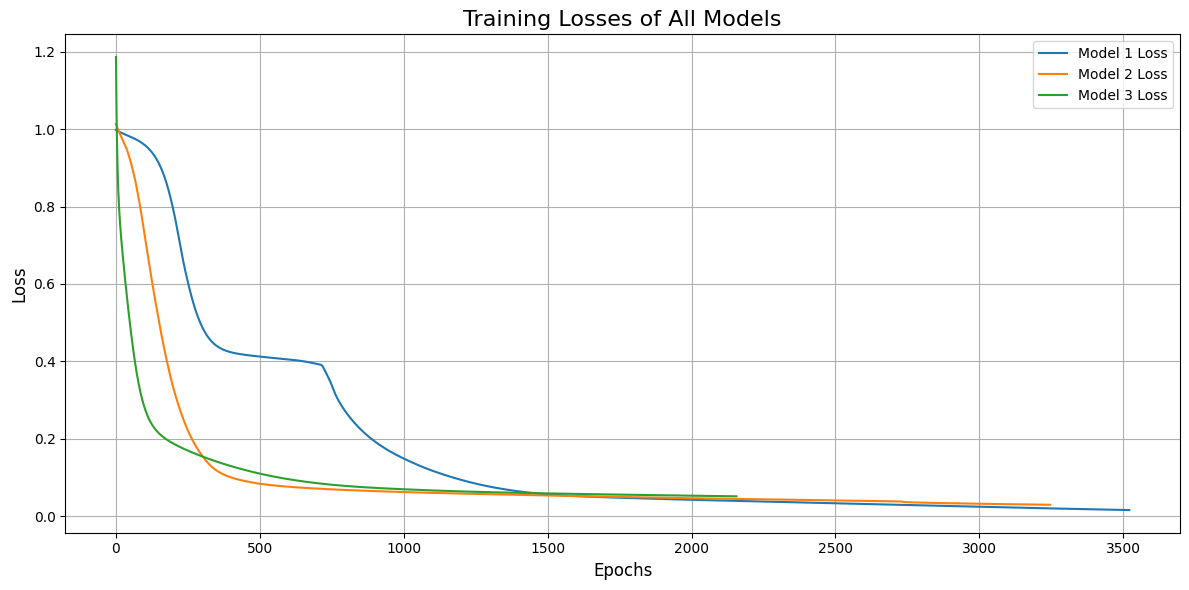

In [8]:
def train_and_plot_losses(models_dict, x_train, y_train):
    losses = {}

    for name, (model, optimizer) in models_dict.items():
        loss = train_model(model, optimizer, x_train, y_train)
        losses[name] = loss

    plt.figure(figsize=(12, 6))
    for name, loss in losses.items():
        plt.plot(loss, label=f'{name} Loss')

    plt.title('Training Losses of All Models', fontsize=16)
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel('Loss', fontsize=12)
    plt.legend(loc='upper right', fontsize=10)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

models_dict = {
    'Model 1': (model_1_1, optimizer_1_1),
    'Model 2': (model_1_2, optimizer_1_2),
    'Model 3': (model_1_3, optimizer_1_3)
}

train_and_plot_losses(models_dict, x_train, y_train)


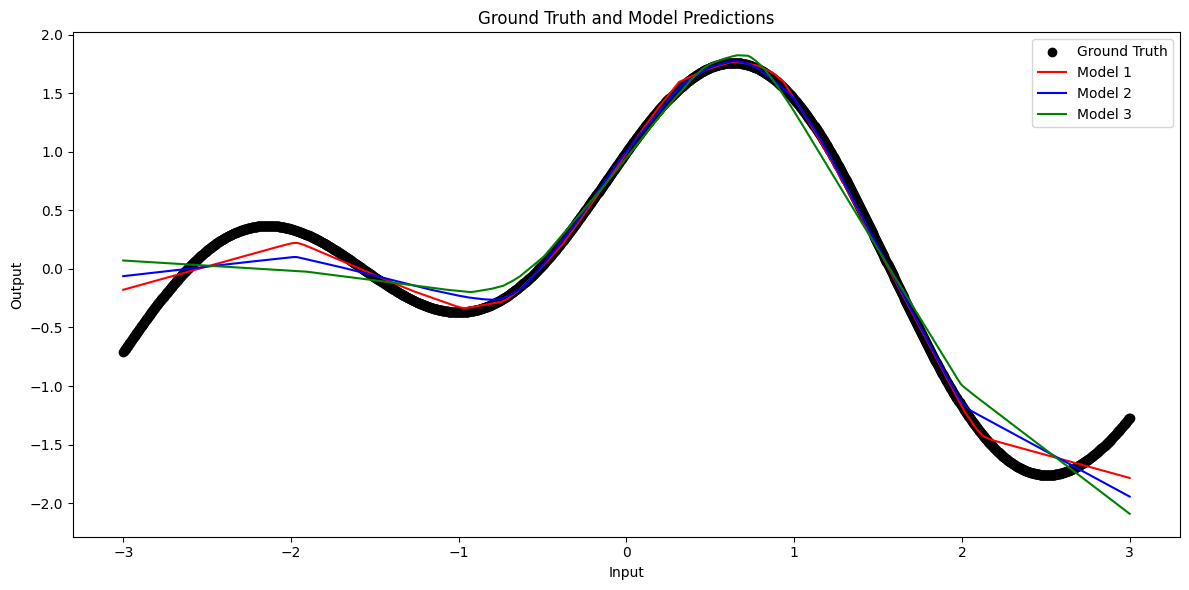

In [9]:
def plot_predictions(x_values, y_true, predictions, labels, colors, title='Ground Truth and Model Predictions'):
    plt.figure(figsize=(12, 6))
    plt.scatter(x_values, y_true, color='black', label='Ground Truth')
    for pred, label, color in zip(predictions, labels, colors):
        plt.plot(x_values, pred, label=label, color=color)
    plt.title(title)
    plt.xlabel('Input')
    plt.ylabel('Output')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Function to get predictions from multiple models
def get_predictions(models, x_values):
    return [model(x_values).detach().numpy() for model in models]

models = [model_1_1, model_1_2, model_1_3]
predictions = get_predictions(models, x_val)

labels = ['Model 1', 'Model 2', 'Model 3']
colors = ['red', 'blue', 'green']

plot_predictions(x_val, y_val, predictions, labels, colors)


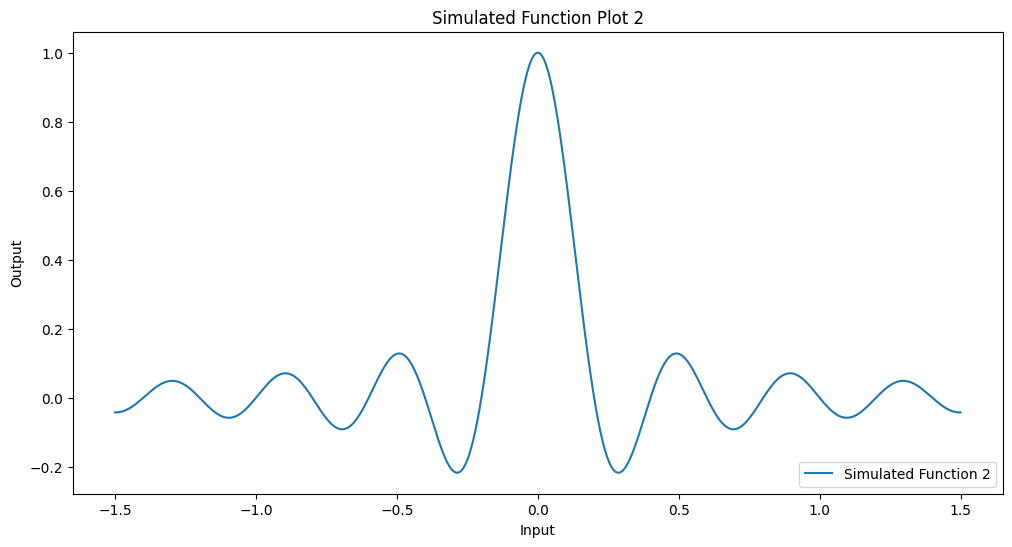

In [10]:
# Function 2
def simulate_function_2(x):
    return np.sinc(5 * x)

# Generate training and validation data as tensors
x_train = torch.tensor(np.linspace(-1.5, 1.5, 6000).reshape(6000, 1), dtype=torch.float32)
y_train = torch.tensor(simulate_function_2(x_train), dtype=torch.float32)

x_val = torch.tensor(np.linspace(-1.5, 1.5, 2000).reshape(2000, 1), dtype=torch.float32)
y_val = torch.tensor(simulate_function_2(x_val), dtype=torch.float32)

# Plot the validation data
plt.figure(figsize=(12, 6))
plt.plot(x_val, y_val, label='Simulated Function 2')
plt.title('Simulated Function Plot 2')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend(loc='lower right')
plt.show()


In [11]:
class Model_1(nn.Module):
    def __init__(self):
        super(Model_1, self).__init__()
        # Keeping the old values: 1 input, 5 neurons in the first layer, and the same for other layers
        self.fc1 = nn.Linear(1, 5)
        self.fc2 = nn.Linear(5, 10)
        self.fc3 = nn.Linear(10, 10)
        self.fc4 = nn.Linear(10, 10)
        self.fc5 = nn.Linear(10, 10)
        self.fc6 = nn.Linear(10, 10)
        self.fc7 = nn.Linear(10, 5)
        self.fc8 = nn.Linear(5, 1)

    def forward(self, x):
        x = F.leaky_relu(self.fc1(x), negative_slope=0.2)
        x = F.leaky_relu(self.fc2(x), negative_slope=0.2)
        x = F.leaky_relu(self.fc3(x), negative_slope=0.2)
        x = F.leaky_relu(self.fc4(x), negative_slope=0.2)
        x = F.leaky_relu(self.fc5(x), negative_slope=0.2)
        x = F.leaky_relu(self.fc6(x), negative_slope=0.2)
        x = F.leaky_relu(self.fc7(x), negative_slope=0.2)
        output = self.fc8(x)
        return output

# Initializes a model (Model_1) with the old architecture, sets up an optimizer (Adam), defines a loss function (MSE)
model_2_1 = Model_1()
optimizer_2_1 = torch.optim.Adam(model_2_1.parameters(), lr=1e-2)
loss_function = torch.nn.MSELoss()

# Calculate total number of parameters in the model
model_2_1_total_params = sum(p.numel() for p in model_2_1.parameters())
print(f'Number of Model 2_1 Parameters: {model_2_1_total_params}')

Number of Model 2_1 Parameters: 571


In [12]:
class Model_2(nn.Module):
    def __init__(self):
        super(Model_2, self).__init__()
        # Define layers explicitly, keeping the same architecture
        self.fc1 = nn.Linear(1, 10)
        self.fc2 = nn.Linear(10, 17)
        self.fc3 = nn.Linear(17, 14)
        self.fc4 = nn.Linear(14, 6)
        self.fc5 = nn.Linear(6, 1)

    def forward(self, x):
        x = F.leaky_relu(self.fc1(x), negative_slope=0.2)
        x = F.leaky_relu(self.fc2(x), negative_slope=0.2)
        x = F.leaky_relu(self.fc3(x), negative_slope=0.2)
        x = F.leaky_relu(self.fc4(x), negative_slope=0.2)
        output = self.fc5(x)
        return output

# Initializes a model (Model_2), sets up an optimizer (Adam), defines a loss function (MSE)
model_2_2 = Model_2()
optimizer_2_2 = torch.optim.Adam(model_2_2.parameters(), lr=1e-2)
loss_function = torch.nn.MSELoss()

# Calculate total number of parameters in the model
model_2_2_total_params = sum(p.numel() for p in model_2_2.parameters())
print(f'Number of Model 2_2 Parameters: {model_2_2_total_params}')


Number of Model 2_2 Parameters: 556


In [13]:
class Model_3(nn.Module):
    def __init__(self):
        super(Model_3, self).__init__()
        # Explicitly define the layers, keeping the same architecture
        self.fc1 = nn.Linear(1, 182)
        self.fc2 = nn.Linear(182, 1)

    def forward(self, x):
        x = F.leaky_relu(self.fc1(x), negative_slope=0.2)
        output = self.fc2(x)
        return output

# Initializes a model (Model_3), sets up an optimizer (Adam), and defines a loss function (MSE)
model_2_3 = Model_3()
optimizer_2_3 = torch.optim.Adam(model_2_3.parameters(), lr=1e-2)
loss_function = torch.nn.MSELoss()

# Calculate total number of parameters in the model
model_2_3_total_params = sum(p.numel() for p in model_2_3.parameters())
print(f'Number of Model 3_1 Parameters: {model_2_3_total_params}')


Number of Model 3_1 Parameters: 547


Epoch: 0, Loss = 0.1072
Convergence reached at epoch 39 with Loss = 0.06130101531744003
Epoch: 0, Loss = 0.0663
Convergence reached at epoch 58 with Loss = 0.005953469779342413
Epoch: 0, Loss = 0.1523
Epoch: 150, Loss = 0.0263
Convergence reached at epoch 242 with Loss = 0.013832958415150642


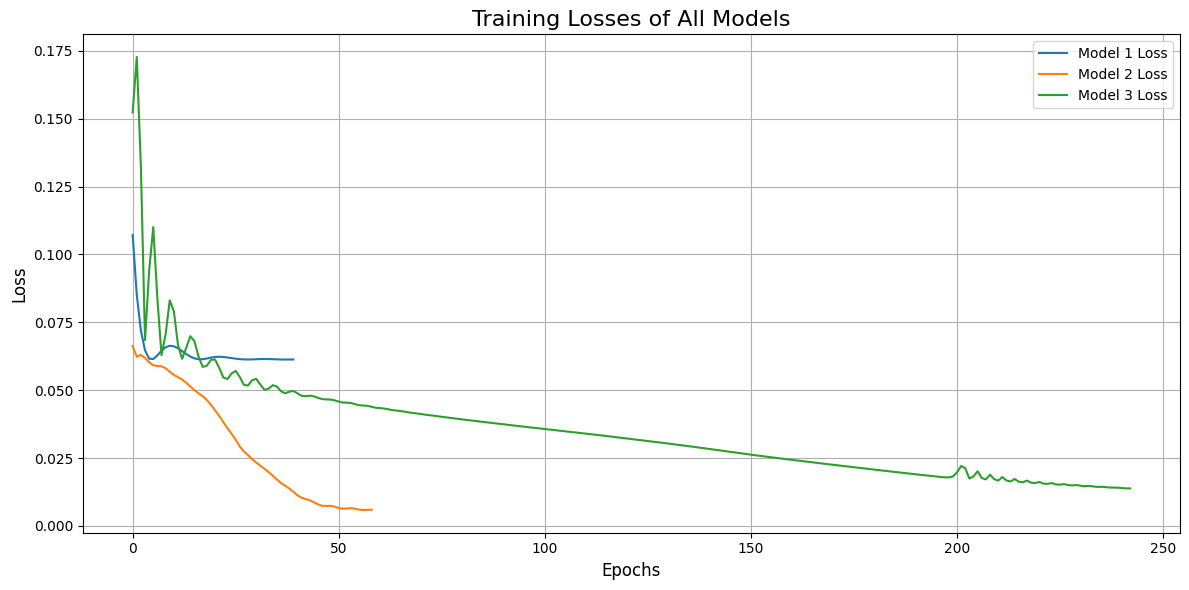

In [14]:
def train_and_plot_losses(models_dict, x_train, y_train):
    losses = {}

    for name, (model, optimizer) in models_dict.items():
        loss = train_model(model, optimizer, x_train, y_train)
        losses[name] = loss

    plt.figure(figsize=(12, 6))
    for name, loss in losses.items():
        plt.plot(loss, label=f'{name} Loss')

    plt.title('Training Losses of All Models', fontsize=16)
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel('Loss', fontsize=12)
    plt.legend(loc='upper right', fontsize=10)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

models_dict = {
    'Model 1': (model_2_1, optimizer_2_1),
    'Model 2': (model_2_2, optimizer_2_2),
    'Model 3': (model_2_3, optimizer_2_3)
}

train_and_plot_losses(models_dict, x_train, y_train)


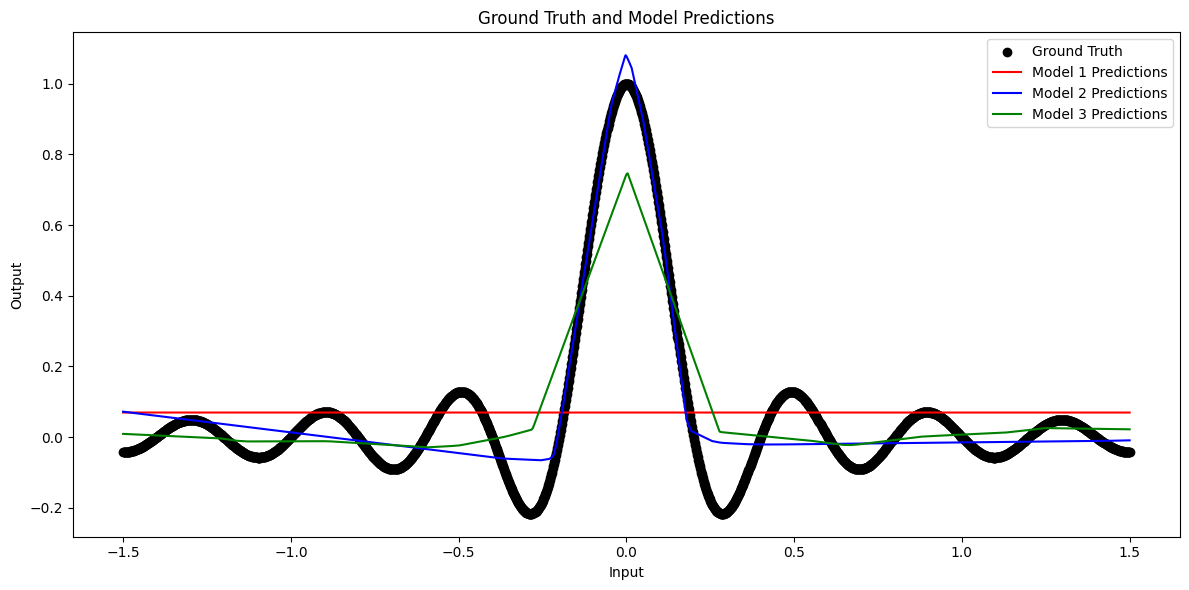

In [15]:
def plot_predictions(x_values, y_true, predictions, labels, colors, title='Ground Truth and Model Predictions'):
    plt.figure(figsize=(12, 6))
    plt.scatter(x_values, y_true, color='black', label='Ground Truth')
    for pred, label, color in zip(predictions, labels, colors):
        plt.plot(x_values, pred, label=label, color=color)
    plt.title(title)
    plt.xlabel('Input')
    plt.ylabel('Output')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Function to get predictions from multiple models
def get_predictions(models, x_values):
    predictions = []
    for model in models:
        model.eval()  # Set the model to evaluation mode
        with torch.no_grad():  # Disable gradient calculation
            predictions.append(model(x_values).detach().numpy())
    return predictions

# Define models and labels consistent with the original version
models = [model_2_1, model_2_2, model_2_3]
predictions = get_predictions(models, x_val)

# Update labels and colors accordingly
labels = ['Model 1 Predictions', 'Model 2 Predictions', 'Model 3 Predictions']
colors = ['red', 'blue', 'green']

# Plot predictions with updated function
plot_predictions(x_val, y_val, predictions, labels, colors)
